#파이썬 학습

이성주 seongjoo@codebasic.co


In [3]:
msg = "hello, world"
print(msg)

hello, world


In [2]:
path = 'pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
line = open(path).readline()
print(type(line))
# JSON 문자열을 해석해 dict으로 변환
data_entry = json.loads(line)
print(type(data_entry))
print(data_entry['cy'])

<type 'str'>
<type 'dict'>
Danvers


#### JSON 형식 데이터를 파이썬으로 가져오기

In [7]:
import json
records = [json.loads(line) for line in open(path)] #파일의 모든 줄을 읽어서와서 list에 담기

In [8]:
records[1]

{u'a': u'GoogleMaps/RochesterNY',
 u'c': u'US',
 u'cy': u'Provo',
 u'g': u'mwszkS',
 u'gr': u'UT',
 u'h': u'mwszkS',
 u'hc': 1308262393,
 u'hh': u'j.mp',
 u'l': u'bitly',
 u'll': [40.218102, -111.613297],
 u'nk': 0,
 u'r': u'http://www.AwareMap.com/',
 u't': 1331923249,
 u'tz': u'America/Denver',
 u'u': u'http://www.monroecounty.gov/etc/911/rss.php'}

In [9]:
# 첫 번째 데이터의 tz 필드
print(records[0]['tz'])

America/New_York


####   데이터에서 시간대 정보 (tz)만을 추출

In [11]:
time_zones = [rec['tz'] for rec in records]  # 오류 발생

KeyError: 'tz'

In [12]:
# records 데이터에서 'tz' 필드의 값을 time_zones로 저장
# 'tz' 필드가 있는 경우만
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [13]:
time_zones[:10] # 처음 10개 값 -->  펜더스를 사용하지 않으면, 값이 있고 없고 체크를 다해야하는 번거로움이 존재

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

#### 개수 세기 함수

In [14]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [18]:
# time_zones에 담긴 값의 빈도수 정보 생성
counts = get_counts(time_zones)

In [19]:
# 특정한 값의 빈도수
counts['America/New_York']

1251

## Pandas

In [20]:
# 필요한 도구 가져오기
from pandas import DataFrame
#records = [{}, {}, ...] 을 pandas.DataFrame으로 생성
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [22]:
# 데이터를 정리
# 해당 데이터에 tz 필드가 없는 경우
clean_tz = frame['tz'].fillna('Missing')
# 필드는 있는데, 값이 빈 경우
clean_tz[clean_tz == ''] = 'Unknown'

# 정리된 데이터에 대해 통계 수치 추출
# tz_counts = clean_tz.value_counts()
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

## DataFrame을 생성하는 방법
 : 분석을 위한 DataFrame은 단일한 형태로 가는것이 바람직하다.
 
 * pd.read_csv() : 파일로부터 dataFrame을 생성
 * pd.merge() : 관계형 데이터베이스에서 join과 동작이 유사
 * dataframe을 만들때 noSQL DB로부터 생성도 가능 --> 교재 6.4장 참조
 * pivot_table()
 * plot()

## Series이 함수

 * value_counts()
 * fillna() //na = not available
 * dropna()
 * plot()

## 그래프로 표현하기
IPython NoteBook 내 그래프로 표현하기

데이터프레임내 Series를 어떻게 가져오는가가 중요하다.
시각화는 plot() 함수를 통해서 구현이 가능하며, web에서는 d3.js로 가능

- Series : 2차원 데이터 프레임내에 열 하나

In [23]:
%matplotlib inline

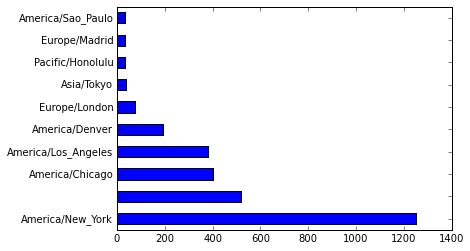

In [28]:
# 그래프로 표현
tz_counts[:10].plot(kind='barh', rot=0)

#### 접속한 웹브라우저 정보 추출하기

In [29]:
# na : 값이 없는 애를 말한다.
from pandas import Series
agents = frame.a.dropna()
agents[:5]
agents.value_counts()[:8]

Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2) Gecko/20100101 Firefox/10.0.2                                   309
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11    229
GoogleMaps/RochesterNY                                                                                         121
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11            93
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)                                          92
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11            81
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.2.28) Gecko/20120306 Firefox/3.6.28                      79
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2                                           75
dtype: int64

In [30]:
import numpy as np

# frame의 'a' 필드의 값이 없는 경우를 걸러낸다.
cframe = frame[frame.a.notnull()]

# cframe의 'a' 필드의 문자열이 'Windows'를 포함하면
# 그 값을 'Windows'라고 하고,
# 아니면 'Not Windows'라고 한다.
operating_system = np.where(
    cframe['a'].str.contains('Windows'),
        'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

####  패키지를 설치하는 이유
Pandas : Numpy를 별도로 설치해야 하는데, 어려움이 많다. 하지만 시중의 패키지를 설치하면 쉽게 설치가 가능하다.

Numpy : 수학연산, 행렬연산에서 주로 사용하는 패키지

Python

In [32]:
%pwd  #IPython에서 수행하는 명령, '%'는 매직이라고 한다.

u'/Users/bookboogie/Documents/bigpy'

In [35]:
import pandas as pd

# 필드명
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('pydata-book/ch02/movielens/users.dat',
                   sep='::', # 구분자 설정
                   header=None, # 첫 번째 행부터 데이터
                   names=unames, # 열 이름 매핑
                   encoding='latin1') # 파일 인코딩

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('pydata-book/ch02/movielens/ratings.dat',
                   sep='::',
                   header=None,
                   names=rnames,
                   encoding='latin1')

mnames = ['movie_id', 'title', 'geners']
movies = pd.read_csv('pydata-book/ch02/movielens/movies.dat',
                   sep='::',
                   header=None,
                   names=mnames,
                   encoding='latin1')

In [36]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [37]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [38]:
movies

,movie_id,title,geners
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


#### "열 방향" 합치기

 - 관계형 데이터의 inner join과 동일하다. (서로 다른 디비에 있는 자료 비교에 좋다, 스키마 설계 작업이 필요없다)
 - 서로 다른 열을 가진 DataFrame 합치기
 - merge() 함수에 순서는 굉장히 중요하다. left join 순서를 의미한다.

In [39]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,geners
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [40]:
# 32비트라 메모리가 문제라면...
# 조금씩 나눠서 처리해야
ratings_small = ratings[:100]
users_small = users[:100]
movies_small = movies[:100]

smaller_data = pd.merge(pd.merge(ratings_small, users_small), movies_small)
smaller_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,geners
0,1,48,5,978824351,F,1,10,48067,Pocahontas (1995),Animation|Children's|Musical|Romance
1,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy


#### 분석 목표 : 성별에 따른 각 영화 평균 평점 산출

 - pivot_table : index, columns 각각의 항목에 대해서 무엇을 할것인가를 처리하는 테이브
   * aggfunc 값을 어떤 처리를 하냐느에 따라 분석이 달라진다 

In [44]:
mean_ratings = data.pivot_table('rating',
                                    index='title',
                                    columns ='gender',
                                    aggfunc='mean')

In [45]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


#### 분석 목표 : 250건 이상의 평점 정보가 있는 영화만 추려내기

In [46]:
# 각 영화별 평점 정보 개수 추출 --> Map, reduce의 방식이기도 하다.
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [50]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)'],
      dtype='object', name=u'title')

- DataFrame은 행, 열의 index로 모여있다.
 * Series는 하나의 index와 value로 구성되어있다

#### 특정 인덱스만 선택하기

In [51]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


#### 분석목표 : 여성에게 높은 평점을 받은 영화목로 표시

In [52]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


#### 분석목표 : 성별간 평균 평점 차이

In [53]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

#### 분석목표: 여성이 더 선호하는 영화

In [55]:
sorted_by_diff = mean_ratings.sort_index(by ='diff')

In [56]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


분석목표 : 성별에 관계없이 차이가 많은 경우 (표준편차 활용)

In [58]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title[:10]

title
$1,000,000 Duck (1971)               1.092563
'Night Mother (1986)                 1.118636
'Til There Was You (1997)            1.020159
'burbs, The (1989)                   1.107760
...And Justice for All (1979)        0.878110
1-900 (1994)                         0.707107
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [59]:
rating_std_by_title = rating_std_by_title.ix[active_title]

## 2.3

In [66]:
import pandas as pd

names1880 = pd.read_csv('pydata-book/ch02/names/yob1880.txt', names=[u'이름', u'성별', u'출생수']) #기본 sep=','이다.
names1880

,이름,성별,출생수
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [67]:
names1880.groupby(u'성별')[u'출생수'].sum()

성별
F     90993
M    110493
Name: 출생수, dtype: int64

In [70]:
import pandas as pd

years = range(1880,2011) # 연도값 생성

pieces = [] # 데이터 프레임을 담을 배열
columns = ['name', 'sex', 'births']

# 각 연도에 대해 DataFrame 생성
for yr in years:
    # 연도별 데이터 파일 경로 지정
    path = 'pydata-book/ch02/names/yob{}.txt'.format(yr)
    #print(path)
    
    # DataFrame 생성
    frame = pd.read_csv(path, names=columns)
    # 연도 정보 추가
    frame['year'] = yr
    # DataFrame 리스트에 담기
    pieces.append(frame)
    
# 여러 DataFrame을 이어붙이기 --> 열은 동일하고, 길게 이어붙이려 한다.
names = pd.concat(pieces, ignore_index=True)

In [71]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


#### 분석목표 : 연도별 성별 출생수

In [73]:
total_births = names.pivot_table('births',
                                index='year',
                                columns='sex',
                                aggfunc=sum)

# total_births.tail()
total_births[-5:]

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


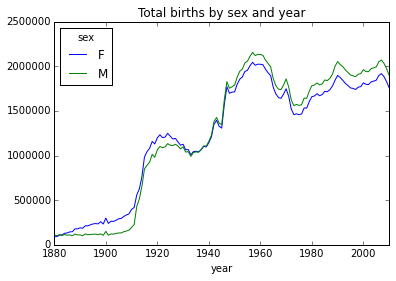

In [74]:
total_births.plot(title='Total births by sex and year')

#### 분석목표: 각 연도별 출생수에서 각 이름의 비율 산출

"영숙아~!"

In [75]:
# 분석목표에 필요한 함수 정의
def add_prop(group):
    #  나누기의 소수점 보존을 위해 정수값을
    # 소수점을 포함하는 값으로 변환
    # 1 --> 1.0
    births = group.births.astype(float)
    
    # 비율 산출
    group['prop'] = births / births.sum()
    return group

# 연도별, 성별로 분류하기
# 분류된 데이터에 대해 분석 기법 적용
names = names.groupby(['year', 'sex']).apply(add_prop)
    

In [76]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155
